In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Imputation
from fancyimpute import IterativeImputer

# Visualize missing
import missingno as msno

%matplotlib inline

In [2]:
df_pdf = pd.read_csv('final.csv')

# Display first 5 Rows.
df_pdf.head()

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,AA_Obfuscated,OpenAction_Obfuscated,AcroForm_Obfuscated,JBIG2Decode_Obfuscated,RichMedia_Obfuscated,Launch_Obfuscated,EmbeddedFile_Obfuscated,XFA_Obfuscated,pageno_Obfuscated,Malicious
0,83f83a146afebd65ad7256e690d671e8,17,260,1,12,0,0,0,0,No,...,0,0,0,0,0,0,0,1,0,No
1,88217c219170bbeb22724ce9282a2ade,183,390,8,231,38,0,0,0,Yes,...,0,0,0,0,0,0,0,8,0,No
2,9e12bb303beaaa619b6ead1b0c7a2670,60,388,3,52,78,0,0,0,Yes,...,0,0,0,0,0,0,0,3,0,No
3,2f088911733a9bc928b806a3267255f2,14,330,2,19,35,0,0,0,Yes,...,0,0,0,0,0,0,0,2,0,No
4,fd44308e1fe91bf9e030922c5e5463ba,14,224,0,20,7,0,0,0,No,...,0,0,0,0,0,0,0,1,0,Yes


In [3]:
# Get a brief summary for our PDF dataset.
df_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30828 entries, 0 to 30827
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   MD5                      30828 non-null  object
 1   pdfsize                  30828 non-null  int64 
 2   metadata size            30828 non-null  int64 
 3   pages                    30828 non-null  int64 
 4   xref length              30828 non-null  int64 
 5   title characters         30828 non-null  int64 
 6   isEncrypted              30828 non-null  int64 
 7   embedded files           30828 non-null  int64 
 8   images                   30828 non-null  int64 
 9   contains text            30828 non-null  object
 10  	header                  30828 non-null  object
 11  obj                      30828 non-null  int64 
 12  endobj                   30828 non-null  int64 
 13  stream                   30828 non-null  int64 
 14  endstream                30828 non-nul

In [4]:
# Check number of (Columns, Rows) in our dataset.
df_pdf.shape  #(31 features, 1 Fine Name, 1 Class -> 45)

(30828, 45)

In [5]:
# check data types for our dataset.
df_pdf.dtypes.value_counts()


int64     41
object     4
Name: count, dtype: int64

In [6]:
# Show Stats summary for our numeric/float64 columns.
df_pdf.describe()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,obj,endobj,...,JavaScript_Obfuscated,AA_Obfuscated,OpenAction_Obfuscated,AcroForm_Obfuscated,JBIG2Decode_Obfuscated,RichMedia_Obfuscated,Launch_Obfuscated,EmbeddedFile_Obfuscated,XFA_Obfuscated,pageno_Obfuscated
count,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,...,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000
mean,54.374497,285.149799,2.781562,3781.653432,33.695374,0.003406,0.016933,-0.025010,37.400804,37.988971,...,0.000551,0.005060,0.000616,0.000260,0.000260,0.000843,0.007623,0.000973,2.897982,0.007201
std,279.275407,1125.855897,9.994180,20478.925677,953.271290,0.059365,0.146892,0.156157,189.913299,220.279652,...,0.023477,0.071413,0.024819,0.016107,0.018009,0.029029,0.087350,0.031181,13.271667,0.087571
min,0.000000,4.000000,0.000000,3.000000,0.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,180.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,15.000000,201.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,50.000000,298.000000,1.000000,45.000000,7.000000,0.000000,0.000000,0.000000,26.000000,26.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,23816.000000,77185.000000,983.000000,263987.000000,76993.000000,1.000000,8.000000,0.000000,22625.000000,22625.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1966.000000,2.000000


In [7]:
# Check total Missing values.
sum(df_pdf.isnull().sum())


0

C:\Users\lky24\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\lky24\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


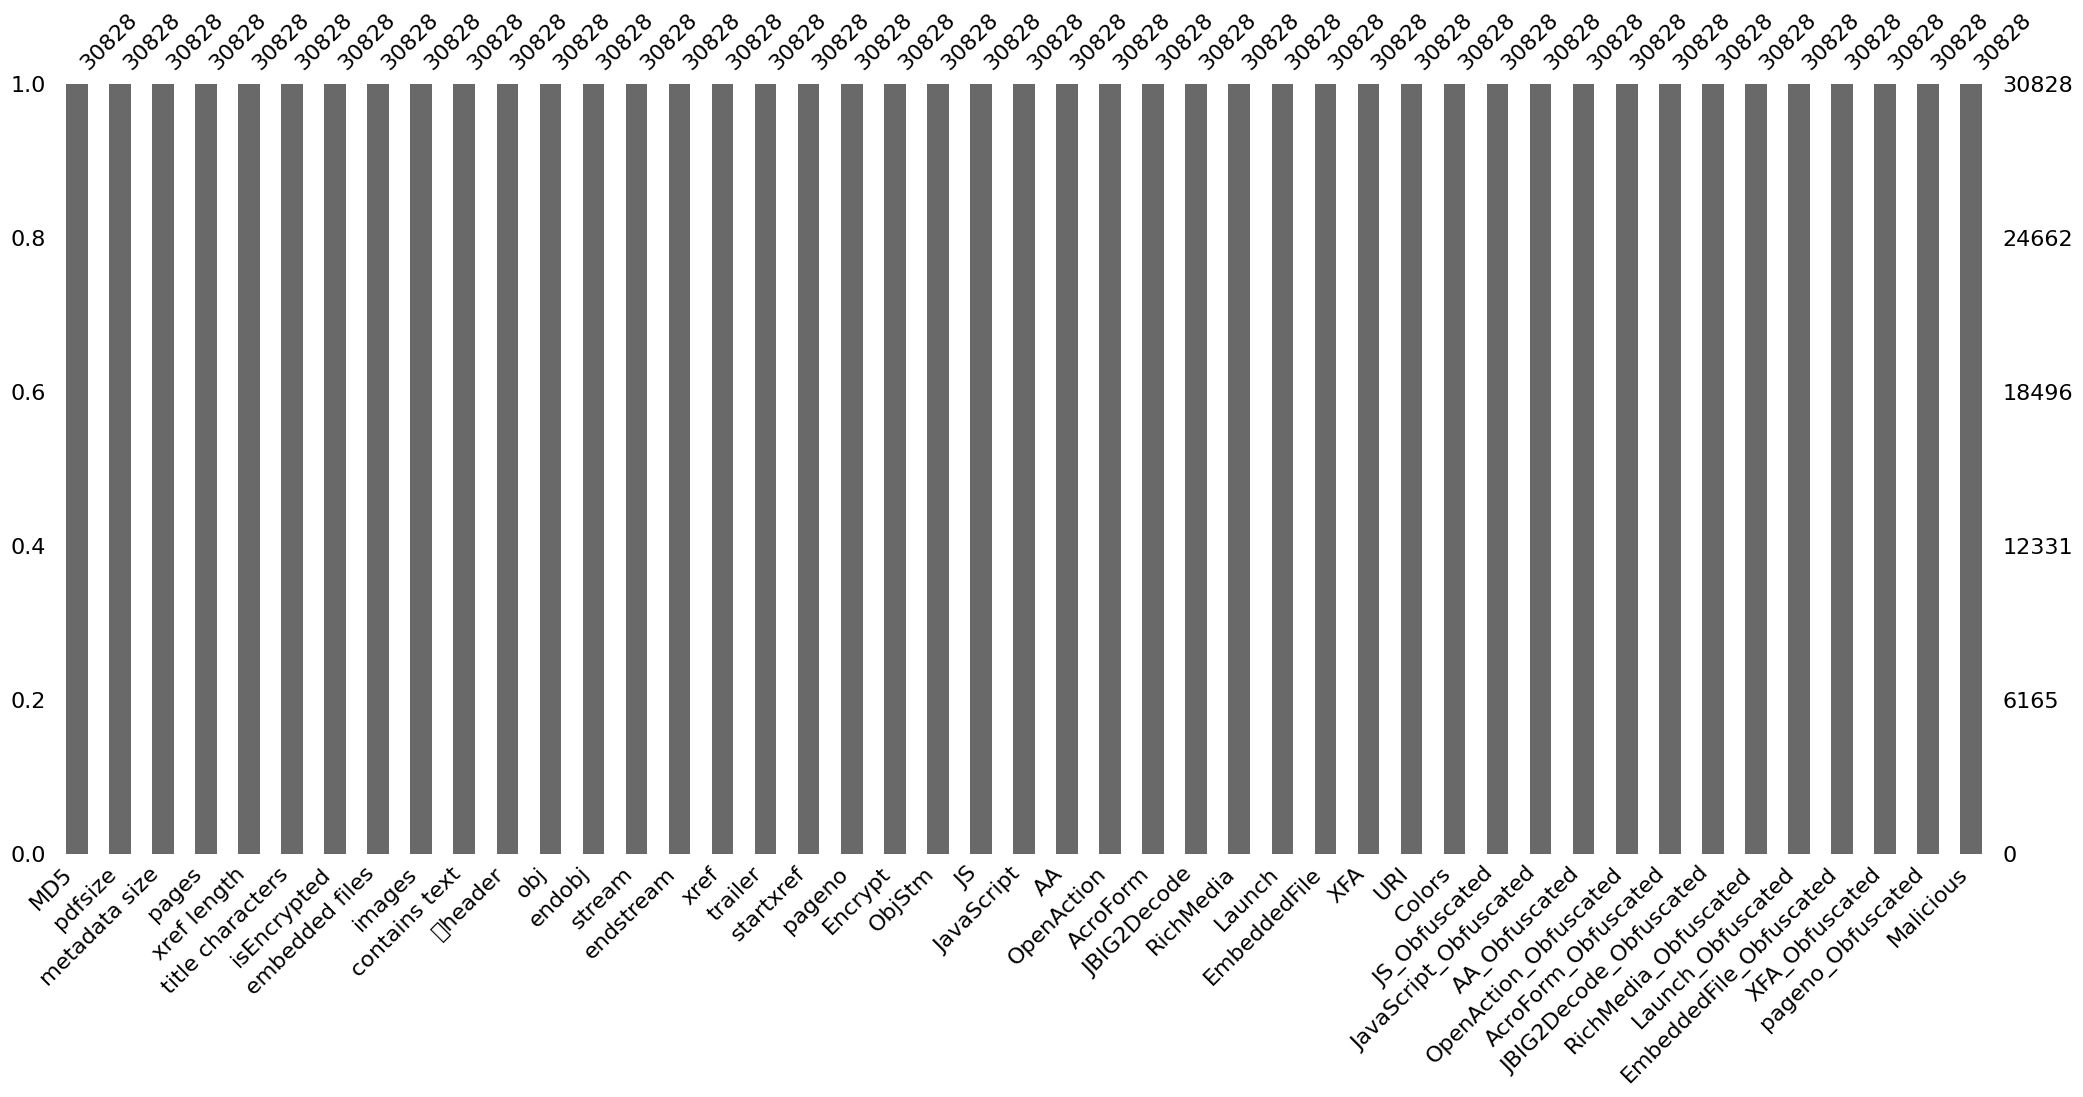

In [8]:
msno.bar(df_pdf);

In [9]:
# Drop Fine Name for now..
df_pdf.drop('MD5', axis = 1, inplace= True)
# store categorical columns to independed vaiable
categorical_columns = [x for x in df_pdf.columns if df_pdf[x].dtype == 'object'] # output 20

# Check values of each categorical column that have missing value/s
for i in categorical_columns:
    print('Number of unique values for *{}*'.format(i), df_pdf[i].nunique())

Number of unique values for *contains text* 3
Number of unique values for *	header* 9
Number of unique values for *Malicious* 2


In [10]:
df_pdf.Malicious.value_counts()

Malicious
Yes    21721
No      9107
Name: count, dtype: int64

In [11]:
df_pdf.drop_duplicates()
df_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30828 entries, 0 to 30827
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   pdfsize                  30828 non-null  int64 
 1   metadata size            30828 non-null  int64 
 2   pages                    30828 non-null  int64 
 3   xref length              30828 non-null  int64 
 4   title characters         30828 non-null  int64 
 5   isEncrypted              30828 non-null  int64 
 6   embedded files           30828 non-null  int64 
 7   images                   30828 non-null  int64 
 8   contains text            30828 non-null  object
 9   	header                  30828 non-null  object
 10  obj                      30828 non-null  int64 
 11  endobj                   30828 non-null  int64 
 12  stream                   30828 non-null  int64 
 13  endstream                30828 non-null  int64 
 14  xref                     30828 non-nul

In [12]:
data = df_pdf.drop(columns=[df_pdf.columns[30], df_pdf.columns[32],df_pdf.columns[33],df_pdf.columns[34],df_pdf.columns[35],df_pdf.columns[36],df_pdf.columns[37],df_pdf.columns[38],df_pdf.columns[39],df_pdf.columns[40],df_pdf.columns[42],df_pdf.columns[41]])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30828 entries, 0 to 30827
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   pdfsize           30828 non-null  int64 
 1   metadata size     30828 non-null  int64 
 2   pages             30828 non-null  int64 
 3   xref length       30828 non-null  int64 
 4   title characters  30828 non-null  int64 
 5   isEncrypted       30828 non-null  int64 
 6   embedded files    30828 non-null  int64 
 7   images            30828 non-null  int64 
 8   contains text     30828 non-null  object
 9   	header           30828 non-null  object
 10  obj               30828 non-null  int64 
 11  endobj            30828 non-null  int64 
 12  stream            30828 non-null  int64 
 13  endstream         30828 non-null  int64 
 14  xref              30828 non-null  int64 
 15  trailer           30828 non-null  int64 
 16  startxref         30828 non-null  int64 
 17  pageno      

In [14]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30828 entries, 0 to 30827
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   pdfsize           30828 non-null  int64 
 1   metadata size     30828 non-null  int64 
 2   pages             30828 non-null  int64 
 3   xref length       30828 non-null  int64 
 4   title characters  30828 non-null  int64 
 5   isEncrypted       30828 non-null  int64 
 6   embedded files    30828 non-null  int64 
 7   images            30828 non-null  int64 
 8   contains text     30828 non-null  object
 9   	header           30828 non-null  object
 10  obj               30828 non-null  int64 
 11  endobj            30828 non-null  int64 
 12  stream            30828 non-null  int64 
 13  endstream         30828 non-null  int64 
 14  xref              30828 non-null  int64 
 15  trailer           30828 non-null  int64 
 16  startxref         30828 non-null  int64 
 17  pageno      

In [15]:
data.iloc[:,9].unique()

array(['\t%PDF-1.2', '\t%PDF-1.4', '\t%PDF-1.6', '\t%PDF-1.7',
       '\t%PDF-1.3', '\t%PDF-1.0', '\tMalformed', '\t%PDF-1.1',
       '\t%PDF-1.5'], dtype=object)

In [16]:
data.iloc[:, 31] = data.iloc[:, 31].map({'Yes': 1, 'No': 0})
data.iloc[:, 8] = data.iloc[:, 8].map({'Yes': 1, 'No': 0,'unclear':0})

In [17]:
from sklearn.preprocessing import LabelEncoder

original_values = np.array(['\t%PDF-1.2', '\t%PDF-1.4', '\t%PDF-1.6', '\t%PDF-1.7',
       '\t%PDF-1.3', '\t%PDF-1.0', '\tMalformed', '\t%PDF-1.1',
       '\t%PDF-1.5'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the original values
numeric_values = label_encoder.fit_transform(original_values)

# Create a mapping of original values to numeric values
value_mapping = {original: encoded for original, encoded in zip(original_values, numeric_values)}

# Convert the 10th column using the mapping
data.iloc[:,9] = df_pdf.iloc[:,9].map(value_mapping)
data.iloc[:,9].unique()

array([2, 4, 6, 7, 3, 0, 8, 1, 5], dtype=object)

In [18]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30828 entries, 0 to 30827
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   pdfsize           30828 non-null  int64 
 1   metadata size     30828 non-null  int64 
 2   pages             30828 non-null  int64 
 3   xref length       30828 non-null  int64 
 4   title characters  30828 non-null  int64 
 5   isEncrypted       30828 non-null  int64 
 6   embedded files    30828 non-null  int64 
 7   images            30828 non-null  int64 
 8   contains text     30828 non-null  object
 9   	header           30828 non-null  object
 10  obj               30828 non-null  int64 
 11  endobj            30828 non-null  int64 
 12  stream            30828 non-null  int64 
 13  endstream         30828 non-null  int64 
 14  xref              30828 non-null  int64 
 15  trailer           30828 non-null  int64 
 16  startxref         30828 non-null  int64 
 17  pageno      

In [19]:
data = data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting non-convertible values to NaN
data.fillna(0, inplace=True)  #

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30828 entries, 0 to 30827
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   pdfsize           30828 non-null  int64
 1   metadata size     30828 non-null  int64
 2   pages             30828 non-null  int64
 3   xref length       30828 non-null  int64
 4   title characters  30828 non-null  int64
 5   isEncrypted       30828 non-null  int64
 6   embedded files    30828 non-null  int64
 7   images            30828 non-null  int64
 8   contains text     30828 non-null  int64
 9   	header           30828 non-null  int64
 10  obj               30828 non-null  int64
 11  endobj            30828 non-null  int64
 12  stream            30828 non-null  int64
 13  endstream         30828 non-null  int64
 14  xref              30828 non-null  int64
 15  trailer           30828 non-null  int64
 16  startxref         30828 non-null  int64
 17  pageno            30828 non-nul

In [20]:
X = data.drop(columns=[ data.columns[31]])  # Adjusted indices
y = data.iloc[:, 31]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30828 entries, 0 to 30827
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   pdfsize           30828 non-null  int64
 1   metadata size     30828 non-null  int64
 2   pages             30828 non-null  int64
 3   xref length       30828 non-null  int64
 4   title characters  30828 non-null  int64
 5   isEncrypted       30828 non-null  int64
 6   embedded files    30828 non-null  int64
 7   images            30828 non-null  int64
 8   contains text     30828 non-null  int64
 9   	header           30828 non-null  int64
 10  obj               30828 non-null  int64
 11  endobj            30828 non-null  int64
 12  stream            30828 non-null  int64
 13  endstream         30828 non-null  int64
 14  xref              30828 non-null  int64
 15  trailer           30828 non-null  int64
 16  startxref         30828 non-null  int64
 17  pageno            30828 non-nul

In [21]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 30828 entries, 0 to 30827
Series name: Malicious
Non-Null Count  Dtype
--------------  -----
30828 non-null  int64
dtypes: int64(1)
memory usage: 241.0 KB


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\Users\lky24\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


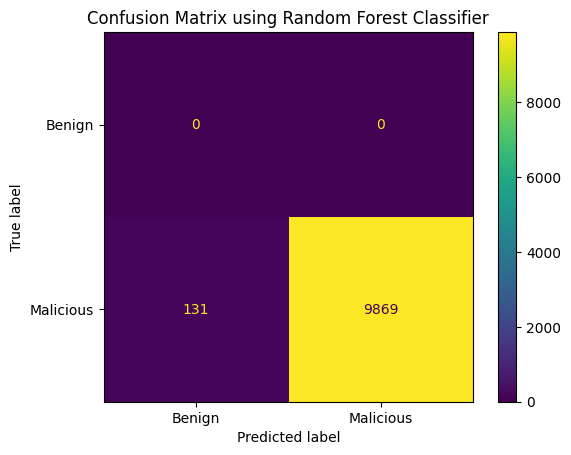

False Positive Rate: nan
True Positive Rate: 0.9869
Accuracy Score: 0.9869


C:\Users\lky24\AppData\Local\Temp\ipykernel_19264\2037219863.py:34: RuntimeWarning: invalid value encountered in scalar divide
  print(f'False Positive Rate: {fpm / (fpm + tnm)}')


In [24]:
Xm = data.drop(columns=[ data.columns[31]])  # Adjusted indices
ym = data.iloc[:, 31]
# Step 1: Separate data where y == 1 and y == 0
Xm_positive = Xm[ym == 1]  # All samples where y == 1
Xm_negative = Xm[ym == 0]  # All samples where y == 0
ym_positive = ym[ym == 1]
ym_negative = ym[ym == 0]

# Step 2: Randomly select 10,000 positive samples for the test set
Xm_test_pos, Xm_train_pos, ym_test_pos, ym_train_pos = train_test_split(
    Xm_positive, ym_positive, test_size=(len(Xm_positive) - 10000), random_state=42)

# Step 3: Combine the training and testing sets
Xm_train = np.concatenate([Xm_train_pos, Xm_negative])
ym_train = np.concatenate([ym_train_pos, ym_negative])
Xm_test = Xm_test_pos  # Only positive samples in the test set
ym_test = ym_test_pos
# Initialize Random Forest Classifier
rfm = RandomForestClassifier(n_estimators=2, max_depth=500, random_state=42, max_features='log2')

# Train the model
rfm.fit(Xm_train, ym_train)

# Make Predictions
y_pred_rfm = rfm.predict(Xm_test)

# Confusion Matrix
tnm, fpm, fnm, tpm = confusion_matrix(ym_test, y_pred_rfm).ravel()
ConfusionMatrixDisplay(confusion_matrix(ym_test, y_pred_rfm), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fpm / (fpm + tnm)}')
print(f'True Positive Rate: {tpm / (tpm + fnm)}')
print(f'Accuracy Score: {accuracy_score(ym_test, y_pred_rfm)}')

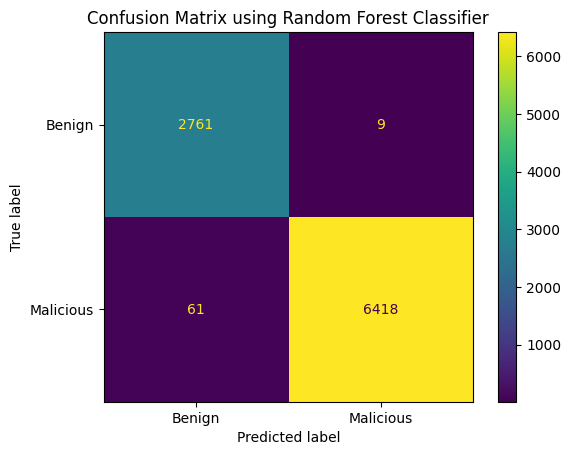

False Positive Rate: 0.003249097472924188
True Positive Rate: 0.9905849668158666
Accuracy Score: 0.9924316142285653


In [25]:

# Ensure y is aligned with X
y = y.iloc[:X.shape[0]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=2, max_depth=500, random_state=42, max_features='log2')

# Train the model
rf.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_rf)}')

C:\Users\lky24\AppData\Local\Temp\ipykernel_19264\1566807807.py:22: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\lky24\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


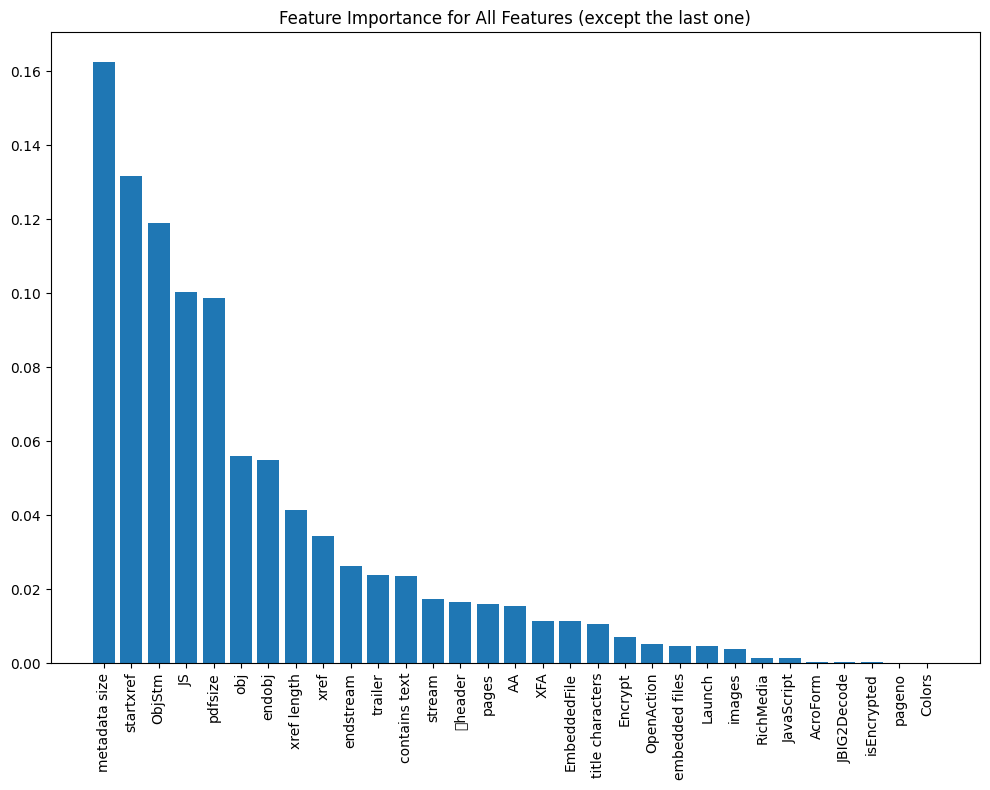

In [26]:
X1 = data.iloc[:, :-1].values  # All columns except the last one
y1 = data.iloc[:, -1].values   # The last column as the target

# If your dataframe is a pandas DataFrame, get feature names (column names except the last one)
feature_names = data.columns[:-1]

# Train the Random Forest model using all features
rf1 = RandomForestClassifier(n_estimators=200, random_state=42)
rf1.fit(X, y)

# Extract feature importances
importances = rf1.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importance graph
plt.figure(figsize=(10, 8))
plt.title("Feature Importance for All Features (except the last one)")
plt.bar(range(X1.shape[1]), importances[indices], align="center")
plt.xticks(range(X1.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()



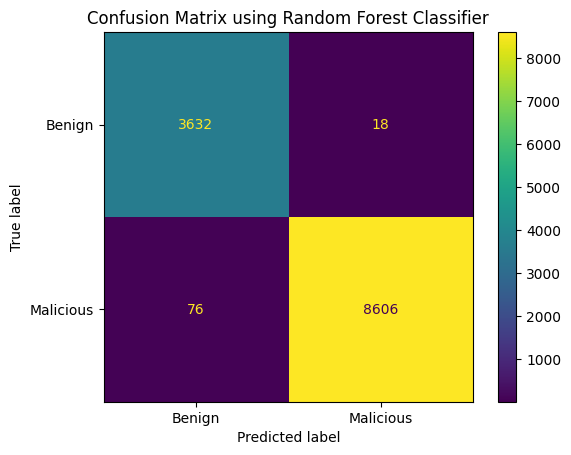

False Positive Rate: 0.004931506849315068
True Positive Rate: 0.991246256622898
Accuracy Score: 0.9923775543301978


In [27]:
X40 = data.drop(columns=[ data.columns[31]])  # Adjusted indices
y40 = data.iloc[:, 31]
# Train-test split
X_train40, X_test40, y_train40, y_test40 = train_test_split(X40, y40, test_size=0.4, random_state=42)


# Initialize Random Forest Classifier
rf40 = RandomForestClassifier(n_estimators=2, max_depth=500, random_state=42, max_features='log2')

# Train the model
rf40.fit(X_train40, y_train40)

# Make Predictions
y_pred_rf40 = rf40.predict(X_test40)

# Confusion Matrix
tn40, fp40, fn40, tp40 = confusion_matrix(y_test40, y_pred_rf40).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test40, y_pred_rf40), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp40 / (fp40 + tn40)}')
print(f'True Positive Rate: {tp40 / (tp40 + fn40)}')
print(f'Accuracy Score: {accuracy_score(y_test40, y_pred_rf40)}')

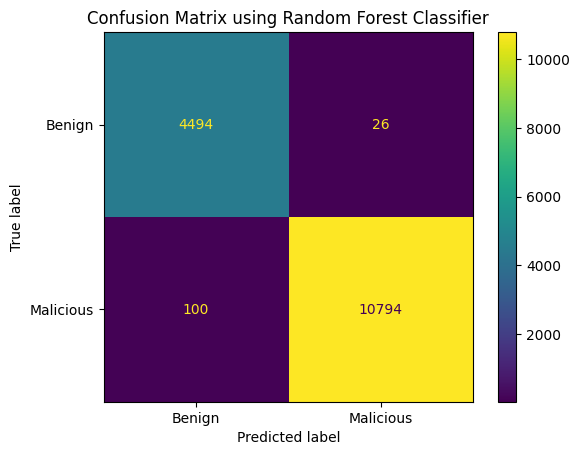

False Positive Rate: 0.005752212389380531
True Positive Rate: 0.9908206352120433
Accuracy Score: 0.9918256130790191


In [28]:
X50 = data.drop(columns=[ data.columns[31]])  # Adjusted indices
y50 = data.iloc[:, 31]
# Train-test split
X_train50, X_test50, y_train50, y_test50 = train_test_split(X50, y50, test_size=0.5, random_state=42)


# Initialize Random Forest Classifier
rf50 = RandomForestClassifier(n_estimators=2, max_depth=500, random_state=42, max_features='log2')

# Train the model
rf50.fit(X_train50, y_train50)

# Make Predictions
y_pred_rf50 = rf50.predict(X_test50)

# Confusion Matrix
tn50, fp50, fn50, tp50 = confusion_matrix(y_test50, y_pred_rf50).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test50, y_pred_rf50), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp50 / (fp50 + tn50)}')
print(f'True Positive Rate: {tp50 / (tp50 + fn50)}')
print(f'Accuracy Score: {accuracy_score(y_test50, y_pred_rf50)}')

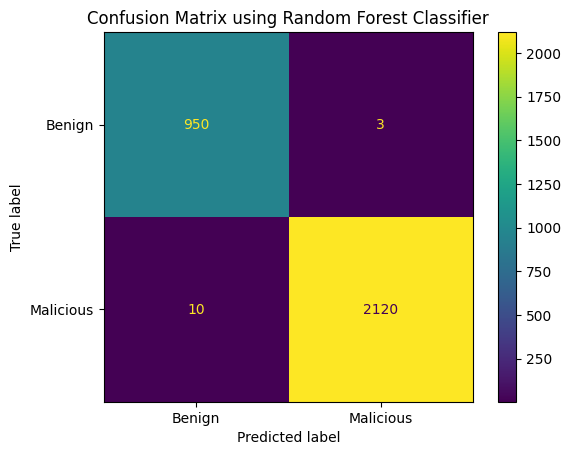

False Positive Rate: 0.0031479538300104933
True Positive Rate: 0.9953051643192489
Accuracy Score: 0.9957833279273435


In [29]:
X10 = data.drop(columns=[ data.columns[31]])  # Adjusted indices
y10 = data.iloc[:, 31]
# Train-test split
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, test_size=0.1, random_state=42)


# Initialize Random Forest Classifier
rf10 = RandomForestClassifier(n_estimators=2, max_depth=500, random_state=42, max_features='log2')

# Train the model
rf10.fit(X_train10, y_train10)

# Make Predictions
y_pred_rf10 = rf10.predict(X_test10)

# Confusion Matrix
tn10, fp10, fn10, tp10 = confusion_matrix(y_test10, y_pred_rf10).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test10, y_pred_rf10), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp10 / (fp10 + tn10)}')
print(f'True Positive Rate: {tp10 / (tp10 + fn10)}')
print(f'Accuracy Score: {accuracy_score(y_test10, y_pred_rf10)}')

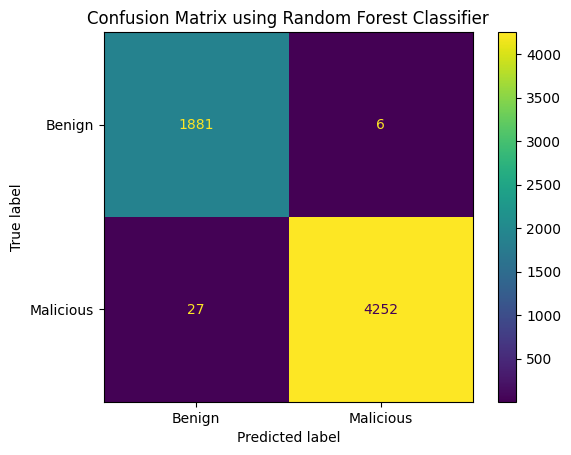

False Positive Rate: 0.003179650238473768
True Positive Rate: 0.9936901145127366
Accuracy Score: 0.9946480700616283


In [30]:
X20 = data.drop(columns=[ data.columns[31]])  # Adjusted indices
y20 = data.iloc[:, 31]
# Train-test split
X_train20, X_test20, y_train20, y_test20 = train_test_split(X20, y20, test_size=0.2, random_state=42)


# Initialize Random Forest Classifier
rf20 = RandomForestClassifier(n_estimators=2, max_depth=500, random_state=42, max_features='log2')

# Train the model
rf20.fit(X_train20, y_train20)

# Make Predictions
y_pred_rf20 = rf20.predict(X_test20)

# Confusion Matrix
tn20, fp20, fn20, tp20 = confusion_matrix(y_test20, y_pred_rf20).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test20, y_pred_rf20), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp20 / (fp20 + tn20)}')
print(f'True Positive Rate: {tp20 / (tp20 + fn20)}')
print(f'Accuracy Score: {accuracy_score(y_test20, y_pred_rf20)}')